In this notebook we take a first look at the photographs and do a little statistical analysis about the distributions of age, gender and ethnicity. We also investigate the size of the pictures in pixels.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_pictures = '/content/drive/MyDrive/pic/'
path_to_dataset = '/content/drive/MyDrive/Colab Notebooks/CVNLP/dataset_faces.csv'

# Import libraries and Modules

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from keras_preprocessing.image import load_img

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Import data

In [ ]:
df = pd.read_csv(path_to_dataset)

In [ ]:
df.head()

,filename,age,gender,ethnicity
0,36_1_1_20170116022026435.jpg,36,1,1
1,36_1_1_20170116153744623.jpg,36,1,1
2,36_1_1_20170116161213859.jpg,36,1,1
3,36_1_1_20170116173257960.jpg,36,1,1
4,36_1_1_20170116161709695.jpg,36,1,1


In [ ]:
# map labels
gender_dict = {0: 'Male', 1: 'Female'}
ethnicity_dict = {}

In [ ]:
df.shape

(24105, 4)

# Explore Data

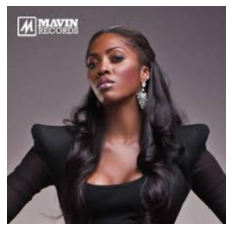

In [ ]:
# Explore first picture
from PIL import Image
img = Image.open(path_to_pictures + df['filename'][0])
plt.axis('off')
plt.imshow(img)

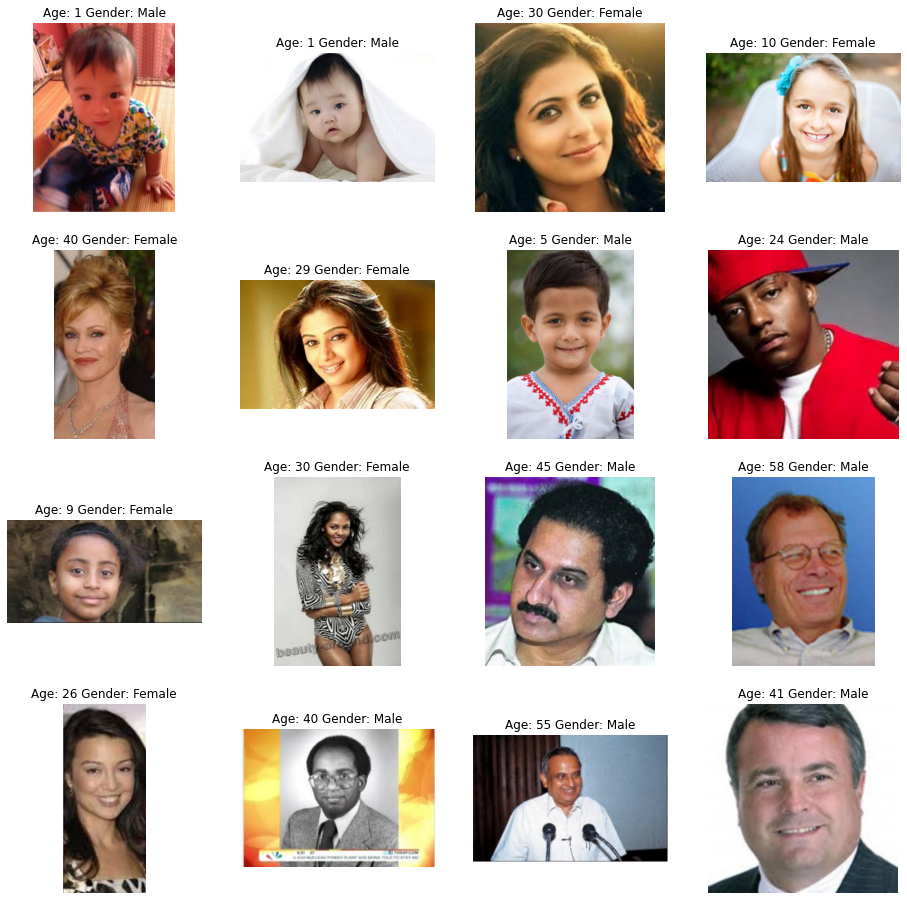

In [ ]:
# Plot random 16 pictures
files = random.sample(list(df.index), k=16) # get random 16 indexes in the df
plt.figure(figsize=(16,16))

for i, index in enumerate(files):
    plt.subplot(4, 4, i + 1) # index starts from 1, not 0
    img = load_img(path_to_pictures + df['filename'][index])
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {df['age'][index]} Gender: {gender_dict[int(df['gender'][index])]}")
    plt.axis('off')

## Explore distributions

### Age distribution

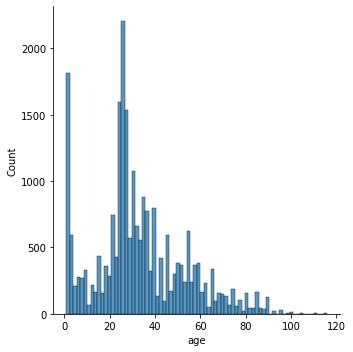

In [ ]:
sns.displot(df['age'])

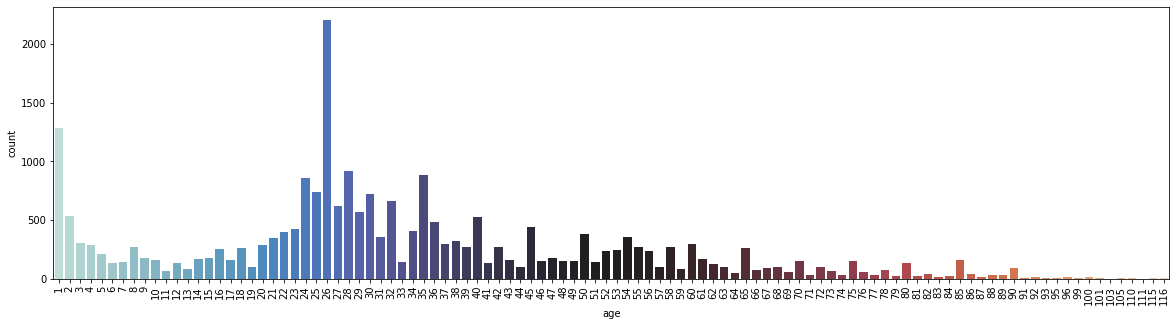

In [ ]:
# try with countplot:
plt.figure(figsize=(20,5))
ax = sns.countplot(df['age'], palette='icefire')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Gender Distribution

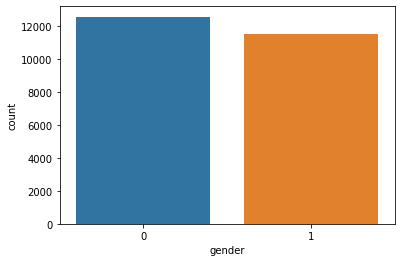

In [ ]:
sns.countplot(df['gender'])

### Ethnicity distribution

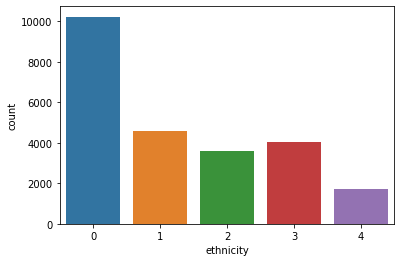

In [ ]:
sns.countplot(df['ethnicity'])

## Explore Images Size

As we can see below, the pictures have different sizes. For some algorithms, it might be beneficial that the images are all the same size. In the next Jupyter Notebook the images will be resize. To get an idea about the appropriate size, we will explore the image sizing in this notebook. 

It was not possible to calculate the average number of pixels considering all the photographs because the computer ran out of RAM. Therefore, we iterate through 2000 random selected pictures (k=2000) and calculate the average number of pixels for those 2000 pictures. 
  

In [ ]:
import random
images = []
pixels_in_x_axis = []
pixels_in_y_axis = []

for idx, image in enumerate(random.sample(list(df['filename']), k=2000)):
  path = path_to_pictures + image
  img = Image.open(path)
  img = np.array(img)
  images.append(img)
  pixels_in_x_axis.append(img.shape[0])
  pixels_in_y_axis.append(img.shape[1])
  if(idx < 10): # Show the size of the first 10 pictures
    print(f"Image {idx} has shape {img.shape}")

Image 0 has shape (851, 954, 3)
Image 1 has shape (317, 322, 3)
Image 2 has shape (449, 345, 3)
Image 3 has shape (655, 1190, 3)
Image 4 has shape (723, 966, 3)
Image 5 has shape (1067, 766, 3)
Image 6 has shape (451, 452, 3)
Image 7 has shape (719, 546, 3)
Image 8 has shape (331, 288, 3)
Image 9 has shape (329, 248, 3)


In [ ]:
pixels_in_x_axis = pd.Series(pixels_in_x_axis)
pixels_in_y_axis = pd.Series(pixels_in_y_axis)

print(f"Mean size for pictures is ({pixels_in_x_axis.mean()} , {pixels_in_y_axis.mean()})")
print(f"Smaller size for x is {pixels_in_x_axis.min()} pixel and for y {pixels_in_y_axis.min()} pixels.")

Mean size for pictures is (665.0585 , 639.575)
Smaller size for x is 69 pixel and for y 103 pixels.
